## Analyze A/B Test Results Project


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries:

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.
a. Read in the dataset and take a look at the top few rows here:

In [125]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [126]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [127]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [128]:
#We are converting it into a percentage:
df.converted.mean()*100

11.965919355605511

e. The number of times the `new_page` and `treatment` don't match.

In [129]:
non_lined_up = df.query('group == "control" and landing_page == "new_page" or group == "treatment" and landing_page == "old_page"').count()
non_lined_up

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page. Store your new dataframe in **df2**.

In [131]:
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


**We now see that we have 290,585 non-null values compared to the 294,478 non-null value we had before. This is 3,893 non-values less, which was the number of the non-lined up values we saw earlier.**

In [133]:
#We will now create and read the new df2 dataframe:
df.to_csv('ab_data_2.csv', index=False)
df2 = pd.read_csv('ab_data_2.csv')

In [134]:
#We need to ensure that all of the correct rows have been removed from the new database we created:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

Output returned as 0, which is basically confirming that we have successfully removed all the non-lined up values from our new dataframe.

In [135]:
#Let's take a look at the top few rows of our new dataframe:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`3.` Use **df2** and the cells below to answer the questions.

a. How many unique **user_id**s are in **df2**?

In [136]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [137]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1876    773192
2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [138]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [139]:
#We decide to remove the first entry (row: 1899), only because row's 2862 timestamp date is later than the
#one for row 1876.
df2.drop(labels = 1876, axis=0, inplace=True)

In [140]:
#We check that there are no longer any duplicated values in the user_id column:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

Series([], Name: user_id, dtype: int64)

In [141]:
#We also check that the user_id 773192 is actually unique:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the questions.

a. What is the probability of an individual converting regardless of the page they receive?

In [142]:
#We are converting it into a percentage:
df2.converted.mean()*100

11.959708724499627

b. Given that an individual was in the `control` group, what is the probability they converted?

In [143]:
#We are converting it into a percentage:
df2[df2['group'] == "control"]['converted'].mean()*100

12.038630450046121

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [144]:
#We are converting it into a percentage:
df2[df2['group'] == "treatment"]['converted'].mean()*100

11.880806551510565

d. What is the probability that an individual received the new page?

In [145]:
#We are converting it into a percentage:
(df2.landing_page == "new_page").mean()*100

50.00619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Based on the results we have seen so far we can say that control group has a slightly higher conversion rate vs. the treatment one; 12.04% vs. 11.88%, respectively. However the difference in these rates is not significant, which does not give us have sufficient evidence to conclude that the new treatment page will lead to more conversions than the old page. Therefore, we should consider and focus on other factors that could help us make a decision on which page works the best.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [146]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [147]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [148]:
n_new = int(df2.query('group == "treatment"')['user_id'].count())
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [149]:
n_old = int(df2.query('group == "control"')['user_id'].count())
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [150]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1 - p_new)]).mean()
new_page_converted

0.12044594315601129

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [151]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1 - p_old)]).mean()
old_page_converted

0.11839696022688162

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [152]:
p_diff = new_page_converted - old_page_converted 
p_diff

0.0020489829291296668

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [153]:
p_diffs = []
for sam in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    p_diff = new_page_converted - old_page_converted 
    p_diffs.append(p_diff)

In [154]:
p_diffs = np.array(p_diffs)
p_diffs

array([-0.00288592,  0.00138111, -0.00066955, ...,  0.00083765,
        0.00046585,  0.00162236])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

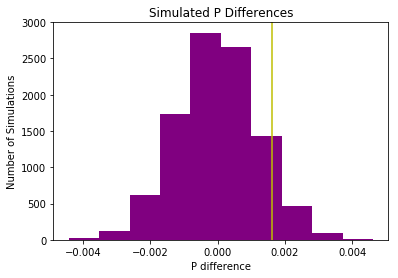

In [155]:
plt.hist(p_diffs, color = "purple")
plt.ylabel('Number of Simulations')
plt.xlabel('P difference')
plt.title('Simulated P Differences')
plt.axvline(x= p_diff, color='y');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [156]:
actual_diff = (df2[df2['group'] == "treatment"]['converted'].mean()) - (df2[df2['group'] == "control"]['converted'].mean())
actual_diff

-0.0015782389853555567

In [157]:
#We can now calculate the proportion of p_diffs that are greater than actual_diff
(p_diffs > actual_diff).mean()

0.90559999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value that we just computed in part j is the p-value. P-value is difined as the best probability, under the null hypothesis and it shows us whether there is a significant difference between two groups.**

**In order for us to accept the null hypothesis, p-value should be greater than suggested p-value. As we saw in our results, there is a 90.5% difference between p_diffs and actual_diff, which shows us that the new page is not performing better than the old one. Therefore, and since the p-value is larger, we fail to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [158]:
import statsmodels.api as sm

#We calculate the number of conversions for each page:
convert_old = sum(df2.query('group == "control"')['converted'])
print(convert_old)
convert_new = sum(df2.query('group == "treatment"')['converted'])
print(convert_new)

#We calculate the number of individuals who received each page:
n_old = int(df2.query("group == 'control'")['user_id'].count())
print(n_old)
n_new = int(df2.query("group == 'treatment'")['user_id'].count())
print(n_new)

17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [159]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score)
print(p_value)

-1.31092419842
0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [160]:
from scipy.stats import norm 

#We want to check how significant the z_score is:
sign_z_score = norm.cdf(z_score)
print(sign_z_score)

#We calculate the critical value at 95% confidence:
critical_value = norm.ppf(1-(0.05))
print(critical_value)

0.094941687241
1.64485362695


**According to our calculations the critical value (at a 95% confidence interval) is at 1.64. This value is much higher than the z_score we have, which is -1.31. Since z_score is lower than the critical value, we, again, fail to reject the null hypothesis that the new page has higher conversion rates than the old one.**

**The p-value we saw at these last steps is quite similar to the one we calculated in parts j. and k. This is an additional reason to accept the null hypothesis, as this shows a higher probability of it.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [161]:
#Create a column for the intercept:
df2['intercept'] = 1

#Create an ab_page column:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [167]:
reg_model = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = reg_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [169]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-07 00:06 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.1899. In Part II we had an one-sided test, whereas in Part III we have a two-sided one.**

**In Part II we tested what proportion of the p_diffs are equal or greater than the actual difference and in Part III we are checking if they differ.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**We could definitely consider other things that might influence whether or not an individual converts. An example would be the timestamp data to identify whether the users convert more during a specific part of the day. This might result in our results being more accurate, therefore this might be something that we need to include.**

**However, adding a lot of factors might not help us at all, as we don't know whether the results will be affected and how.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [174]:
#Read the countries.csv file:
country_df = pd.read_csv('countries.csv')
country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [175]:
#Combine the data:
combined_data = country_df.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
combined_data.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [176]:
#Check unique values in the country column:
combined_data.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [180]:
#We have 3 unique values in the country column, so we will need to include two columns (UK and US); CA will be the baseline
combined_data[['UK', 'US']] = pd.get_dummies(combined_data['country'])[['UK','US']]
combined_data.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [183]:
#Create 2 new columns that show the interaction between page and country:
combined_data['UK_ab_page'] = combined_data['UK']*combined_data['ab_page']
combined_data['US_ab_page'] = combined_data['US']*combined_data['ab_page']
combined_data.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [185]:
reg_model2 = sm.Logit(combined_data['converted'], combined_data[['intercept', 'ab_page', 'US', 'UK', 'US_ab_page', 'US_ab_page']])
results2 = reg_model2.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [187]:
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                 Logit              No. Iterations:     6.0000     
Dependent Variable:    converted          Pseudo R-squared:   0.000      
Date:                  2020-07-07 00:34   AIC:                212782.5603
No. Observations:      290584             BIC:                212835.4585
Df Model:              4                  Log-Likelihood:     -1.0639e+05
Df Residuals:          290579             LL-Null:            -1.0639e+05
Converged:             1.0000             Scale:              1.0000     
-------------------------------------------------------------------------
            Coef.    Std.Err.     z     P>|z|      [0.025       0.975]   
-------------------------------------------------------------------------
intercept  -2.0366      0.0280 -72.6176 0.0000       -2.0916      -1.9817
ab_page    -0.0018      0.0209  -0.0861 0.9313       -0.0427       0.0391
US          0.0501      0.0297   1.6912 0.0908       -0.0080       0.1083
UK          0.0507      0.0284   1.7860 0.0741       -0.0049       0.1064
US_ab_page -0.0094 704237.3061  -0.0000 1.0000 -1380279.7660 1380279.7472
US_ab_page -0.0094 704237.3061  -0.0000 1.0000 -1380279.7660 1380279.7472
=========================================================================

"""

<a id='conclusions'></a>
## Conclusions

According to our results, all the variables we examined had p-values higher than 0.05, which showed us non-statistically significant results.

Based on our data, we do not seem to have sufficient evidence to show that there is a correlation between the country and the page (new or old) that the user landed on that led to a user converting or not. Therefore, we cannot suggest that the new page is driving higher conversion rates than the old one.

For this reason we fail to reject the null hypothesis, and we recommend the company to continue using their existing page as the evidence we have is not enough to support the decision to move to a new page.